In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Scatterplot Cost Model

In [2]:
from numpy import dtype
cardinality = {
 'dummyfloat1': 1,
 'dummyfloat2': 1,
 'id': 48895,
 'name': 47906,
 'host_id': 37457,
 'host_name': 11453,
 'neighbourhood_group': 5,
 'neighbourhood': 221,
 'latitude': 19048,
 'longitude': 14718,
 'room_type': 3,
 'price': 674,
 'minimum_nights': 109,
 'number_of_reviews': 394,
 'last_review': 1765,
 'reviews_per_month': 938,
 'calculated_host_listings_count': 47,
 'availability_365': 366}
dtype = {'id': dtype('int64'),
 'name': dtype('O'),
 'host_id': dtype('int64'),
 'host_name': dtype('O'),
 'neighbourhood_group': dtype('O'),
 'neighbourhood': dtype('O'),
 'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'dummyfloat1': dtype('float64'),
 'dummyfloat2': dtype('float64'),
 'room_type': dtype('O'),
 'price': dtype('int64'),
 'minimum_nights': dtype('int64'),
 'number_of_reviews': dtype('int64'),
 'last_review': dtype('O'),
 'reviews_per_month': dtype('float64'),
 'calculated_host_listings_count': dtype('int64'),
 'availability_365': dtype('int64')}

In [43]:
df = pd.read_csv("../result/costmodel_scatter.csv")
# df["id"]=df["attr1"]+";"+df["attr2"]
# df = df[df["id"]!="latitude;longitude"]

In [44]:
df["G_color1"] = df["attr1"].apply(lambda x: cardinality[x])
df["dtype1"] = df["attr1"].apply(lambda x: str(dtype[x]))
df["G_color2"] = df["attr2"].apply(lambda x: cardinality[x])
df["dtype2"] = df["attr2"].apply(lambda x: str(dtype[x]))
df["G_color"]=df["G_color1"]+df["G_color2"]

In [92]:
y = np.array(df["time"])*1000
N = np.array(df["nPts"])
G_color = np.array(df["G_color"])
X = np.array([N,G_color])

from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

popt, pcov = curve_fit(func, X,y)

y_pred = func(X,*popt)
perr = np.sqrt(np.diag(pcov))
print ("coeff:",popt)
print ("error:", sum(perr))

coeff: [ 2.27828870e+00  6.04242891e-06  1.58974871e-10 -1.74858426e-04]
error: 2.543494123709982


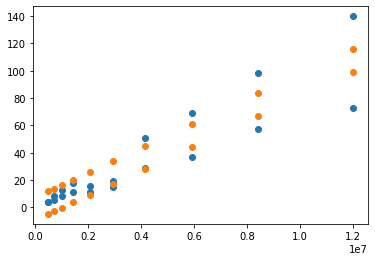

In [91]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

When moving float columns around, e.g. longitude/latitude, each scatterplot takes slightly longer

In [41]:
# df = pd.read_csv("../result/costmodel_scatter.csv")
# df["id"]=df["attr1"]+";"+df["attr2"]
# df = df[(df["id"]=="latitude;longitude")|(df["id"]=="dummyfloat1;dummyfloat2")]

In [47]:
# import altair as alt

# alt.Chart(df).mark_circle().encode(
#     y = "time",
#     x = "nPts",
#     color = alt.Color("id",type="nominal"),
# ).interactive()

### Colored Scatterplot Cost Model

In [48]:
df = pd.read_csv("../result/costmodel_colorscatter.csv")

In [49]:
# df = pd.read_csv("../../lux-datasets/data/airbnb_nyc.csv")

# lux.config.heatmap = False
# from lux.vis.Vis import Vis
# for attr in ['host_id', 'host_name', 'neighbourhood_group','neighbourhood', 'room_type', 'number_of_reviews']:
#     vis = Vis(['price','minimum_nights',lux.Clause(attr,channel="color")], df)
#     vis._repr_html_()

In [50]:
airbnb = pd.read_csv("../../lux-datasets/data/airbnb_nyc.csv")

In [51]:
# df = pd.read_csv("../../lux-datasets/data/airbnb_nyc.csv")

In [52]:
df["G_color"] = df["attr"].apply(lambda x: cardinality[x])
df["dtype"] = df["attr"].apply(lambda x: str(dtype[x]))

In [53]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_color",type="nominal"),
).interactive()

alt.Chart(...)

### Object dtype

In [79]:
df = pd.read_csv("../result/costmodel_colorscatter.csv")
df["G_color"] = df["attr"].apply(lambda x: cardinality[x])
df["dtype"] = df["attr"].apply(lambda x: str(dtype[x]))
df = df[df["dtype"]!="int64"]

In [80]:
y = np.array(df["time"])*1000
N = np.array(df["nPts"])
G_color = np.array(df["G_color"])
X = np.array([N,G_color])

from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

popt, pcov = curve_fit(func, X,y)
popt

array([ 3.30550323e+00,  1.59183456e-05,  8.15864091e-10, -3.46044528e-04])

In [81]:
y_pred = func(X,*popt)
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 8.783206268301111


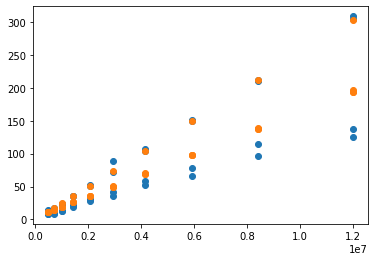

In [82]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Int dtype

In [83]:
df = pd.read_csv("../result/costmodel_colorscatter.csv")
df["G_color"] = df["attr"].apply(lambda x: cardinality[x])
df["dtype"] = df["attr"].apply(lambda x: str(dtype[x]))
df = df[df["dtype"]=="int64"]

In [84]:
y = np.array(df["time"])*1000
N = np.array(df["nPts"])
G_color = np.array(df["G_color"])
X = np.array([N,G_color])

from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

popt, pcov = curve_fit(func, X,y)
popt

array([ 2.27828870e+00,  6.04242891e-06,  1.58974871e-10, -1.74858426e-04])

In [85]:
y_pred = func(X,*popt)

In [86]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 2.543494123709982


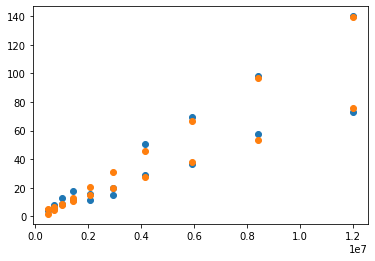

In [87]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Selection-based Scatterplot Cost Model

In [183]:
df = pd.read_csv("../result/costmodel_selection.csv")

In [184]:
df["G_color"] = df["attr"].apply(lambda x: cardinality[x])
df["dtype"] = df["attr"].apply(lambda x: str(dtype[x]))

In [191]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_color",type="ordinal"),
    column = alt.Column("dtype",type="nominal"),
).interactive()

alt.Chart(...)

### The total cost of the scatterplot is the sum of fetching each of the channel columns: 

In [171]:
df = pd.read_csv("../result/costmodel_scatter.csv")
df["id"]=df["attr1"]+";"+df["attr2"]
df = df[df["id"]=="price;minimum_nights"]

In [172]:
colordf = pd.read_csv("../result/costmodel_colorscatter.csv")

In [180]:
import altair as alt

a = alt.Chart(df).mark_circle().encode(
    y = "time",
    x = "nPts",
).interactive()

b = alt.Chart(colordf).mark_circle(color="red").encode(
    y = "time",
    x = "nPts"
).interactive()
a+b

alt.LayerChart(...)

### Bar Chart Cost model 

In [83]:
df = pd.read_csv("../result/costmodel_bar.csv")
df["time"] = df["time"]*1000
bar = df[(df["G_color"]==0)]

In [84]:
import altair as alt

alt.Chart(bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_axes",type="nominal"),
)

alt.Chart(...)

In [85]:
N = np.array(bar["nPts"])
G_axes = np.array(bar["G_axes"])
y = np.array(bar["time"])
X = np.array([N,G_axes])

In [86]:
from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

In [87]:
popt, pcov = curve_fit(func, X,y)
popt

array([2.08279455e+01, 9.89765486e-05, 7.74048323e-09, 2.85891386e-03])

In [88]:
y_pred = func(X,*popt)

In [89]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 91.38983743491983


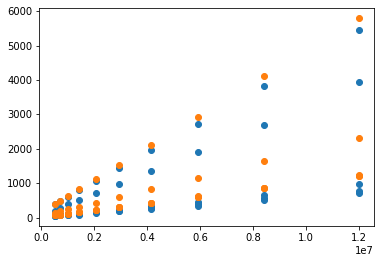

In [92]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Color Bar Chart Cost Model


In [93]:
df = pd.read_csv("../result/costmodel_colorbar.csv")
df["time"] = df["time"]*1000
color_bar = df[(df["G_color"]!=0)]

In [94]:
color_bar["ga*gc"]=color_bar["G_axes"]*color_bar["G_color"]

In [95]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_axes",type="nominal")
)

alt.Chart(...)

In [96]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_color",type="nominal")
).interactive()

alt.Chart(...)

In [97]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("ga*gc",type="nominal")
).interactive()

alt.Chart(...)

In [98]:
N = np.array(color_bar["nPts"])
G_axes = np.array(color_bar["G_axes"])
G_color = np.array(color_bar["G_color"])
y = np.array(color_bar["time"])
X = np.array([N,G_axes,G_color])

In [99]:
from scipy.optimize import curve_fit
def func(x, a, b,c,d,e,f,g):
    return a + b * x[0] + c*x[1]+ d*x[2] +e*x[0]*x[1] + f*x[1]*x[2]  + g*x[0]*x[2]

In [100]:
popt, pcov = curve_fit(func, X,y)
popt

array([ 3.71161713e+01,  1.27866029e-04,  2.01123956e-02, -1.81489405e-02,
        2.21736120e-08,  1.88026625e-03,  2.29023360e-08])

In [101]:
y_pred = func(X,*popt)

In [102]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 40.59561254465439


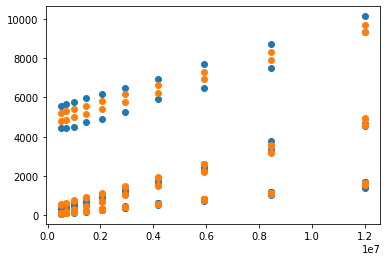

In [103]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Histogram 

In [241]:
import altair as alt

In [242]:
df = pd.read_csv("../result/costmodel_histogram.csv")
df["time"] = df["time"]*1000

In [256]:
alt.Chart(df).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbin",type="quantitative")
)

alt.Chart(...)

In [244]:
N = np.array(df["nPts"])
Nbin = np.array(df["nbin"])
y = np.array(df["time"])
X = np.array([N,Nbin])

In [267]:
from scipy.optimize import curve_fit
def func(x, a, b):#,c):
    return a + b * x[0]#+ c*x[1] #+ d*x[0]*x[1]

In [268]:
popt, pcov = curve_fit(func, X,y)
popt

array([5.31229086e+00, 1.38194325e-05])

In [269]:
y_pred = func(X,*popt)

In [270]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 0.4148482784548995


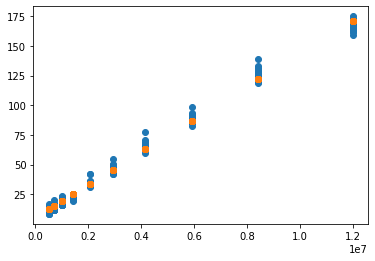

In [271]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

In [113]:
# Verify that coefficient value is the same with linear fitting
coeff, residuals, rank, singular_values, rcond = np.polyfit(N,y,1,full=True)
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [1.53415316e-05 2.39562438e+00]
error: 5253.032837455612


Histogram processing speed has no dependence on the number of bins

###  Heatmap Cost Model

In [225]:
df = pd.read_csv("../result/costmodel_heatmap.csv")
df["time"] = df["time"]*1000
df.nbin = df.nbin.astype(int)

In [235]:
alt.Chart(df).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbin",type="ordinal"),
    row="mark"
)

alt.Chart(...)

In [236]:
vdf = df[df["mark"]=="heatmap"]

In [237]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])

In [238]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a + b * x[0]#+ c*x[1]

In [239]:
popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [1.74877169e+00 4.80732118e-06]


In [240]:
y_pred = func(X,*popt)

In [216]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 2.139638258118922


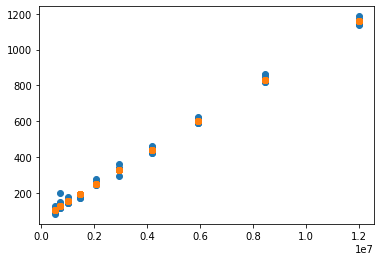

In [217]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

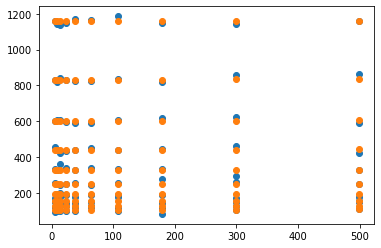

In [136]:
dim = 1
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

- Heatmap processing time is also not very dependent on number of bins/cells. It is also not strongly dependent on the number of data points since the data has already been binned into fixed number of cells

In [197]:
vdf = df[df["mark"]=="categorical color heatmap"]

In [198]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])
def func(x, a, b):
    return a + b * x[0]#+ c*x[1]# + d * x[0]*x[1]

In [199]:
popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [1.26063061e+02 2.63439721e-04]


In [200]:
y_pred = func(X,*popt)

In [201]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 7.0415925604036484


In [202]:
alt.Chart(vdf).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbin",type="ordinal")
).interactive()

alt.Chart(...)

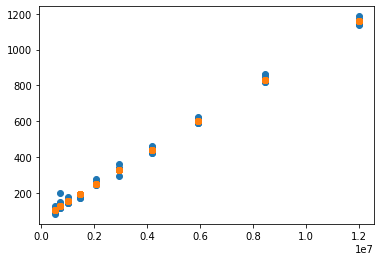

In [222]:
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

In [204]:
vdf = df[df["mark"]=="quantitative color heatmap"]

In [205]:
N = np.array(vdf["nPts"])
Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])
def func(x, a, b):
    return a + b * x[0]#+ c*x[1]# + d * x[0]*x[1]

popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [9.23846973e+01 1.11369290e-04]


In [207]:
alt.Chart(vdf).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbin",type="ordinal")
).interactive()

alt.Chart(...)

In [208]:
y_pred = func(X,*popt)

In [209]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 24.430320466486958


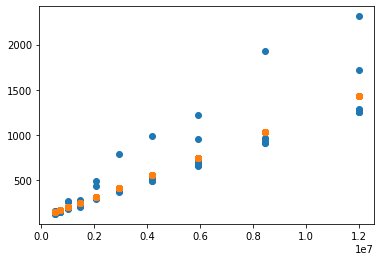

In [210]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')